In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
Raw_housing_data=pd.read_csv("1. Regression - Module - (Housing Prices).csv")

<Axes: xlabel='Sale Price'>

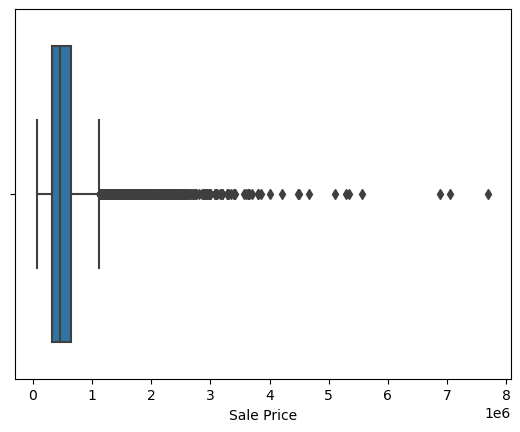

In [2]:
sns.boxplot(x=Raw_housing_data['Sale Price'])

In [3]:
Raw_housing_data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [4]:
#treatment of outliers using imputing
q1=Raw_housing_data['Sale Price'].quantile(0.25)
q3=Raw_housing_data['Sale Price'].quantile(0.75)

In [5]:
iqr=q3-q1
iqr

323050.0

In [6]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [7]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [8]:
Raw_housing_data['Sale Price']=Raw_housing_data['Sale Price'].apply(limit_imputer)
Raw_housing_data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [9]:
'''When we're dealing with missing values in the target variable, its not recommended to use the imputation method to 
treat the missing values because the predictive models in ML learns from the target variable. Imputing the target variable
will mean that the predictive model will learn from the data we are deriving and not the actual true data. So, avoid imputation
of the target variable as much as possible.(Deletion is generally preferred over imputation in such cases)'''

"When we're dealing with missing values in the target variable, its not recommended to use the imputation method to \ntreat the missing values because the predictive models in ML learns from the target variable. Imputing the target variable\nwill mean that the predictive model will learn from the data we are deriving and not the actual true data. So, avoid imputation\nof the target variable as much as possible.(Deletion is generally preferred over imputation in such cases)"

In [12]:
#removing missing values of the sale price:
Raw_housing_data.dropna(inplace=True, axis=0, subset=['Sale Price'])
Raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

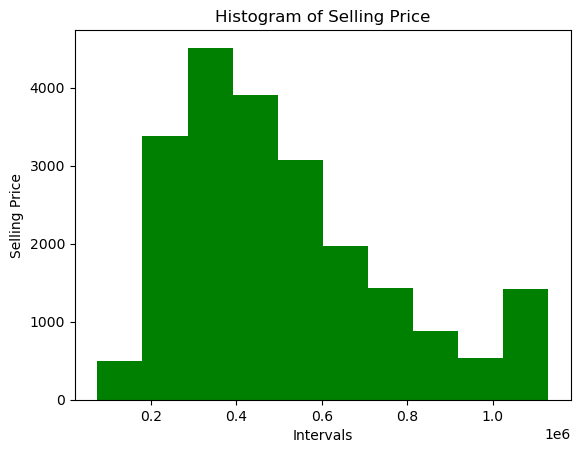

In [11]:
#plotting histogram:
plt.hist(Raw_housing_data['Sale Price'], bins=10, color='green')
plt.xlabel("Intervals")
plt.ylabel("Selling Price")
plt.title("Histogram of Selling Price")
plt.show()

In [ ]:
#from above histogram we can see that data is skewed towards lower values